In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import style as st

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers.shape

(200, 5)

In [5]:
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

In [8]:
correlation = customers.corr()

C:\Users\MP25B\AppData\Local\Temp\ipykernel_14472\1518983204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = customers.corr()


In [9]:
customers.drop(["CustomerID"],axis=1,inplace=True)

In [10]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Heatmap of Correlation

<Axes: >

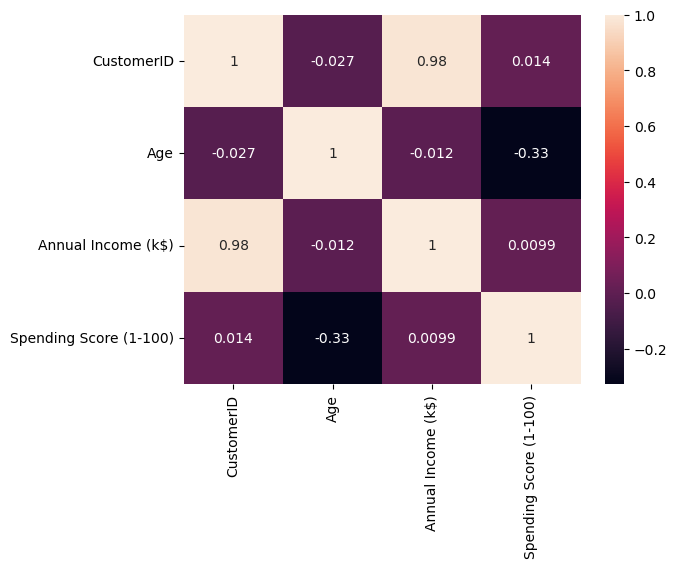

In [11]:
sns.heatmap(correlation,annot=True)

Distplot of Spending Scores and Annual Income

Text(0.5, 1.0, 'Distplot of Spending Score (1-100)')

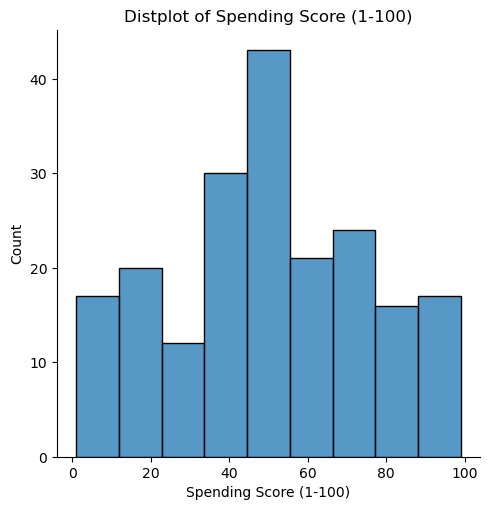

In [12]:
sns.displot(customers['Spending Score (1-100)'])
plt.title('Distplot of Spending Score (1-100)')

Text(0.5, 1.0, 'Distplot of Income')

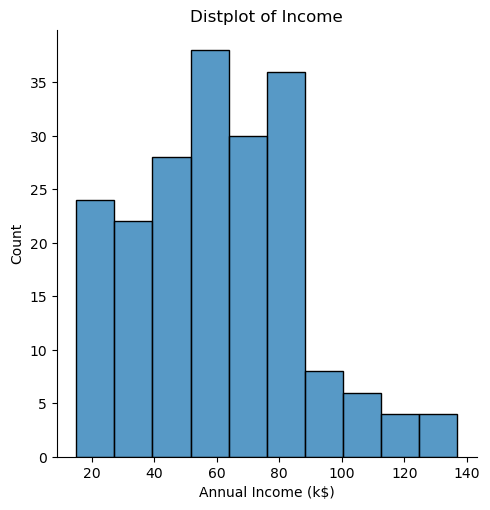

In [13]:
sns.displot(customers['Annual Income (k$)'])
plt.title('Distplot of Income')

Countplot of Gender

Text(0.5, 1.0, 'Countplot of Gender')

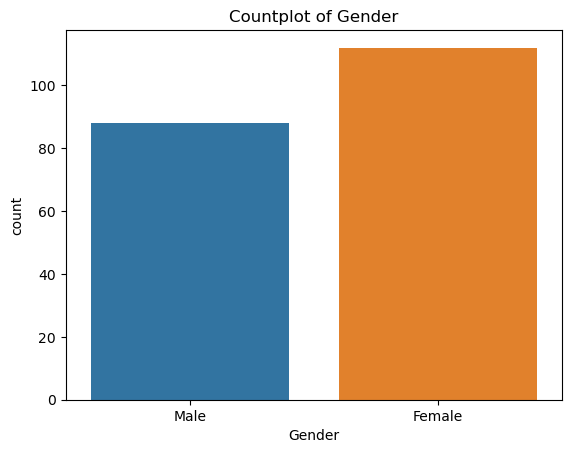

In [14]:
sns.countplot(data=customers,x='Gender')
plt.title('Countplot of Gender')

Dividing all three measures in particular ranges

In [16]:
ai_0_30 = customers['Annual Income (k$)'][(customers['Annual Income (k$)']>=0) & (customers['Annual Income (k$)'] <=30)]
ai_31_60 = customers['Annual Income (k$)'][(customers['Annual Income (k$)']>=31) &(customers['Annual Income (k$)'] <=60)]
ai_61_90 = customers['Annual Income (k$)'][(customers['Annual Income (k$)']>=61) & (customers['Annual Income (k$)'] <=90)]
ai_91_120 = customers['Annual Income (k$)'][(customers['Annual Income (k$)']>=91) & (customers['Annual Income (k$)'] <=120)]
ai_121_150 = customers['Annual Income (k$)'][(customers['Annual Income (k$)']>=121) & (customers['Annual Income (k$)'] <=150)]

In [17]:
income_x = ["0-30","31-60","61-90","91-120","121-150"]
incomey_y = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

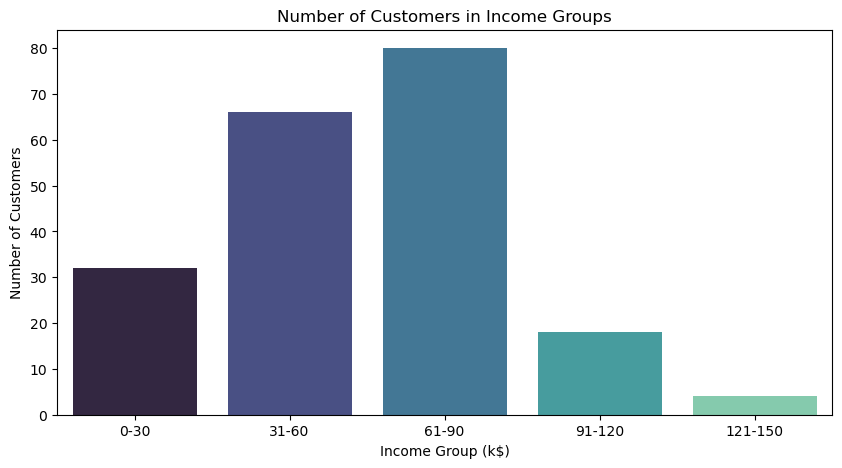

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=income_x,y=incomey_y,palette='mako')
plt.title("Number of Customers in Income Groups")
plt.xlabel("Income Group (k$)")
plt.ylabel("Number of Customers")
plt.show()

In [19]:
#Bifurcation of Age
Age_18_25 = customers.Age[(customers.Age >=18) & (customers.Age <= 25)]
Age_26_35 = customers.Age[(customers.Age >=26) & (customers.Age <= 35)]
Age_36_45 = customers.Age[(customers.Age >=36) & (customers.Age <= 45)]
Age_46_55 = customers.Age[(customers.Age >=46) & (customers.Age <= 55)]
Age_55above = customers.Age[(customers.Age >55)]

In [20]:
Age_x = ["18-25","26-35","36-45","46-55","55+"]
Age_y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55above.values)]

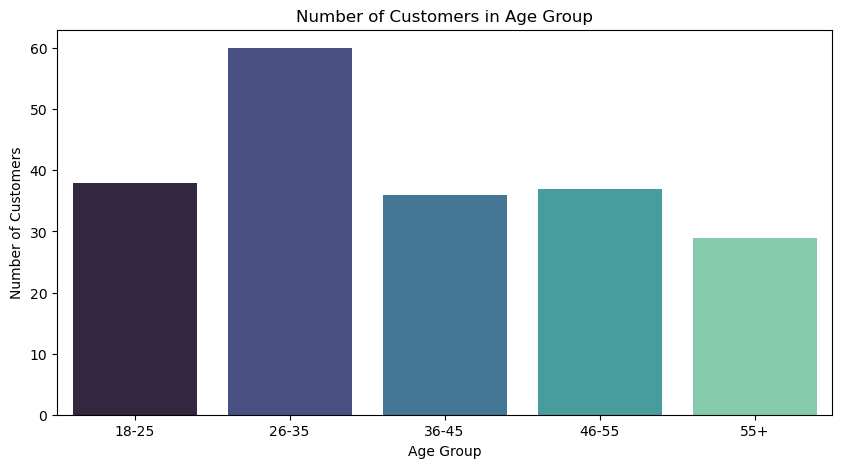

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=Age_x,y=Age_y,palette='mako')
plt.title("Number of Customers in Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

Relationship plot between Annual Income and Spending Scores

(8.899999999999999, 143.1, -3.9000000000000004, 103.9)

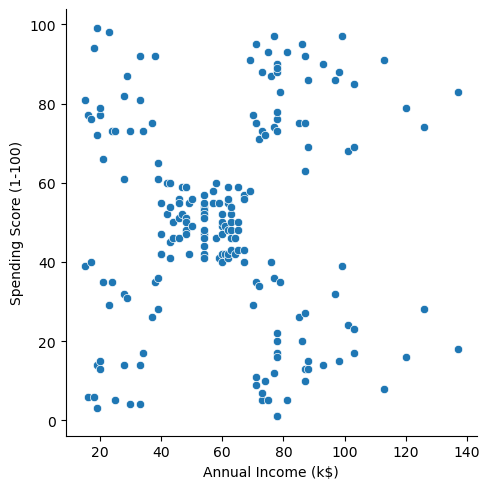

In [22]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customers)
plt.axis()

In [23]:
#Bifurcation of Spending Scores
ss_1_20 = customers['Spending Score (1-100)'][(customers['Spending Score (1-100)']>=1) & (customers['Spending Score (1-100)'] <=20)]
ss_21_40 = customers['Spending Score (1-100)'][(customers['Spending Score (1-100)']>=21) &(customers['Spending Score (1-100)'] <=40)]
ss_41_60 = customers['Spending Score (1-100)'][(customers['Spending Score (1-100)']>=41) & (customers['Spending Score (1-100)'] <=60)]
ss_61_80 = customers['Spending Score (1-100)'][(customers['Spending Score (1-100)']>=61) & (customers['Spending Score (1-100)'] <=80)]
ss_81_100 = customers['Spending Score (1-100)'][(customers['Spending Score (1-100)']>=81) & (customers['Spending Score (1-100)'] <=100)]

In [24]:
ss_x = ["1-20","21-40","41-60","61-80","81-100"]
ss_y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

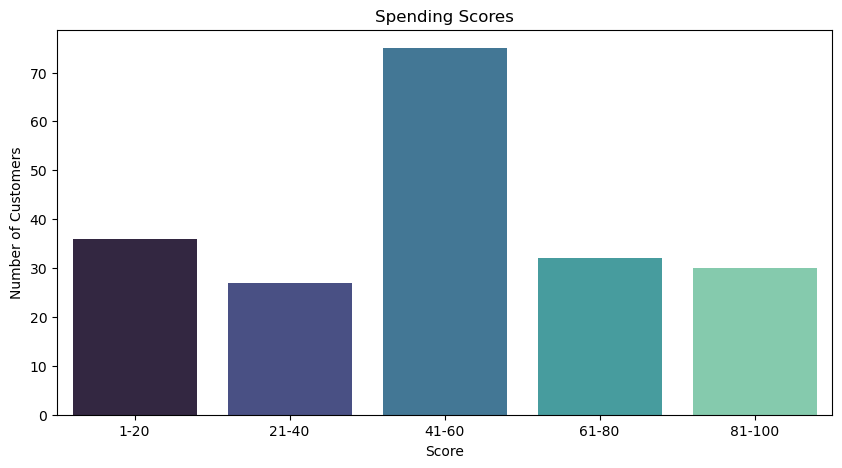

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x=ss_x,y=ss_y,palette='mako')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers")
plt.show()

## Converting Gender Labels into (0,1)
0-Female , 1-Male

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
customers[['Gender']]

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [29]:
encoded_data = encoder.fit_transform(customers[['Gender']])

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
encoded_data

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [31]:
customers['Gender'] = encoded_data

In [32]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Plotting Graphs Using K-Means Algorithm

1. Relationship between Age and Spending Scores

In [33]:
x1 = customers.loc[:,["Age",'Spending Score (1-100)']].values

In [34]:
x1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

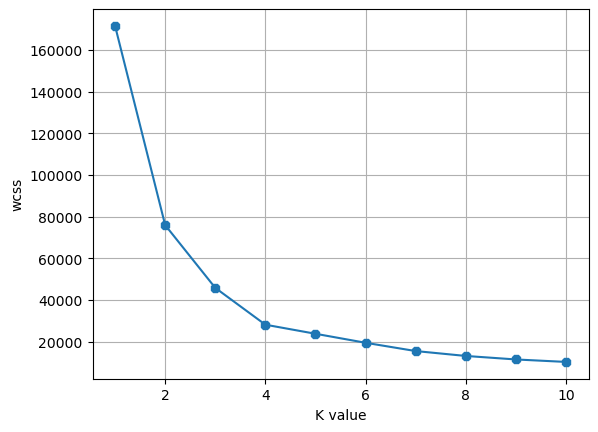

In [35]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
plt.grid()
plt.plot(range(1,11),wcss,marker="8")
plt.xlabel("K value")
plt.ylabel("wcss")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [37]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


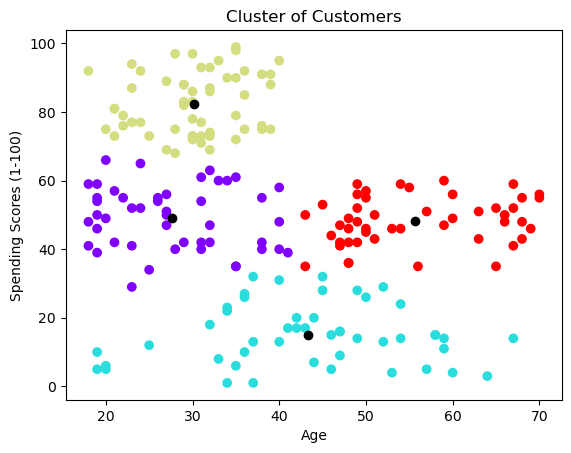

In [38]:
plt.grid
plt.scatter(x1[:,0],x1[:,1], c=kmeans.labels_ ,  cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Scores (1-100)")
plt.show()

2. Relationship between Annual Income and Spending Scores

In [39]:
x2 = customers.loc[:,["Annual Income (k$)",'Spending Score (1-100)']].values

In [40]:
x2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

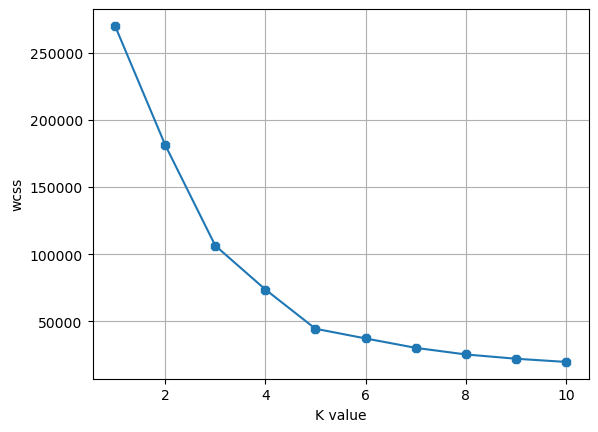

In [41]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
plt.grid()
plt.plot(range(1,11),wcss,marker="8")
plt.xlabel("K value")
plt.ylabel("wcss")
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
print(label)

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [43]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


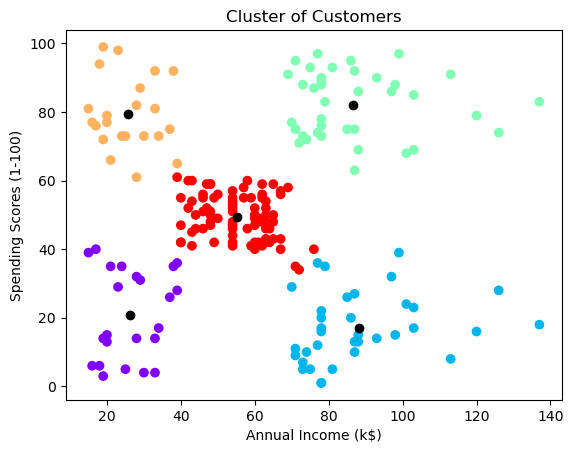

In [44]:
plt.grid
plt.scatter(x2[:,0],x2[:,1], c=kmeans.labels_ ,  cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Scores (1-100)")
plt.show()

3. Relationship between Gender and Spending Scores

In [45]:
x3 = customers.loc[:,["Gender",'Spending Score (1-100)']].values

In [46]:
x3

array([[ 1, 39],
       [ 1, 81],
       [ 0,  6],
       [ 0, 77],
       [ 0, 40],
       [ 0, 76],
       [ 0,  6],
       [ 0, 94],
       [ 1,  3],
       [ 0, 72],
       [ 1, 14],
       [ 0, 99],
       [ 0, 15],
       [ 0, 77],
       [ 1, 13],
       [ 1, 79],
       [ 0, 35],
       [ 1, 66],
       [ 1, 29],
       [ 0, 98],
       [ 1, 35],
       [ 1, 73],
       [ 0,  5],
       [ 1, 73],
       [ 0, 14],
       [ 1, 82],
       [ 0, 32],
       [ 1, 61],
       [ 0, 31],
       [ 0, 87],
       [ 1,  4],
       [ 0, 73],
       [ 1,  4],
       [ 1, 92],
       [ 0, 14],
       [ 0, 81],
       [ 0, 17],
       [ 0, 73],
       [ 0, 26],
       [ 0, 75],
       [ 0, 35],
       [ 1, 92],
       [ 1, 36],
       [ 0, 61],
       [ 0, 28],
       [ 0, 65],
       [ 0, 55],
       [ 0, 47],
       [ 0, 42],
       [ 0, 42],
       [ 0, 52],
       [ 1, 60],
       [ 0, 54],
       [ 1, 60],
       [ 0, 45],
       [ 1, 41],
       [ 0, 50],
       [ 1, 46],
       [ 0, 51

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

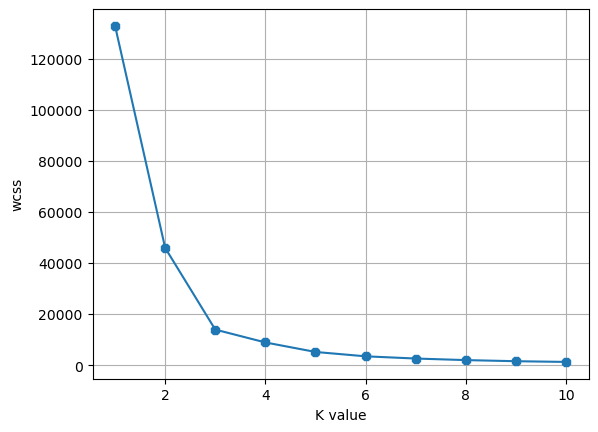

In [47]:

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
plt.grid()
plt.plot(range(1,11),wcss,marker="8")
plt.xlabel("K value")
plt.ylabel("wcss")
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x3)
print(label)

C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MP25B\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [49]:
print(kmeans.cluster_centers_)

[[ 0.42372881 81.77966102]
 [ 0.41489362 48.18085106]
 [ 0.5106383  14.59574468]]


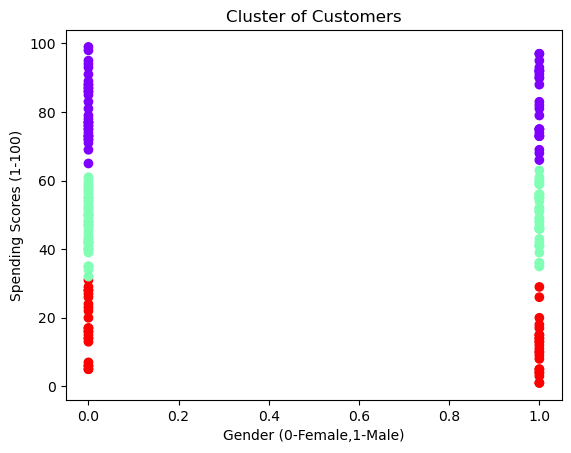

In [50]:
plt.grid
plt.scatter(x3[:,0],x3[:,1], c=kmeans.labels_ ,  cmap="rainbow")
plt.title("Cluster of Customers")
plt.xlabel("Gender (0-Female,1-Male)")
plt.ylabel("Spending Scores (1-100)")
plt.show()